In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib.dates import AutoDateLocator, DateFormatter
import seaborn as sns

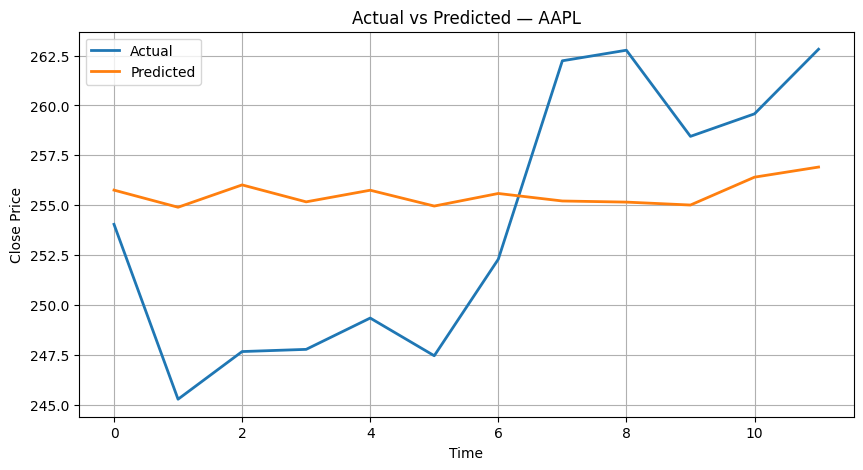

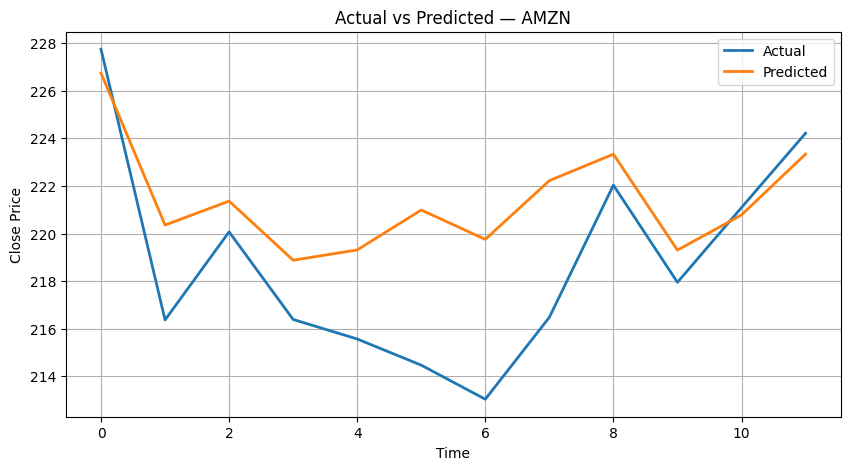

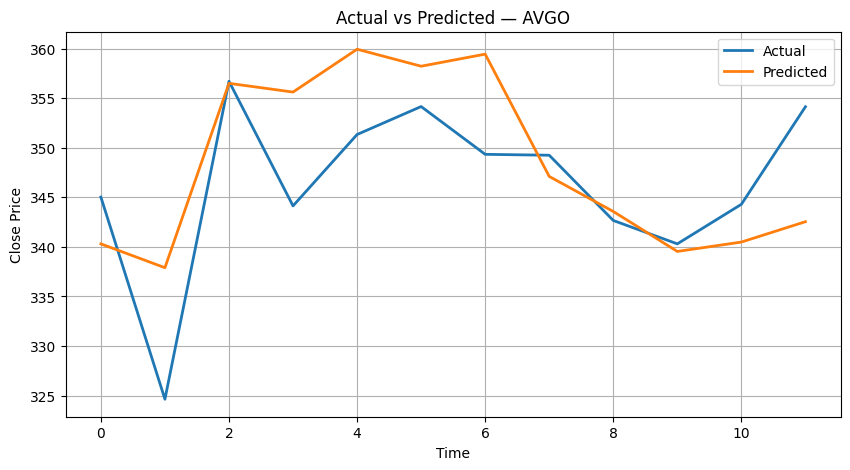

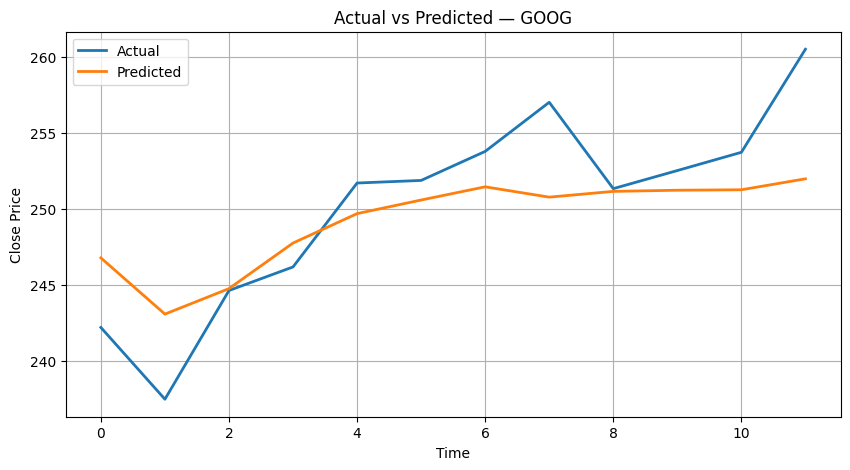

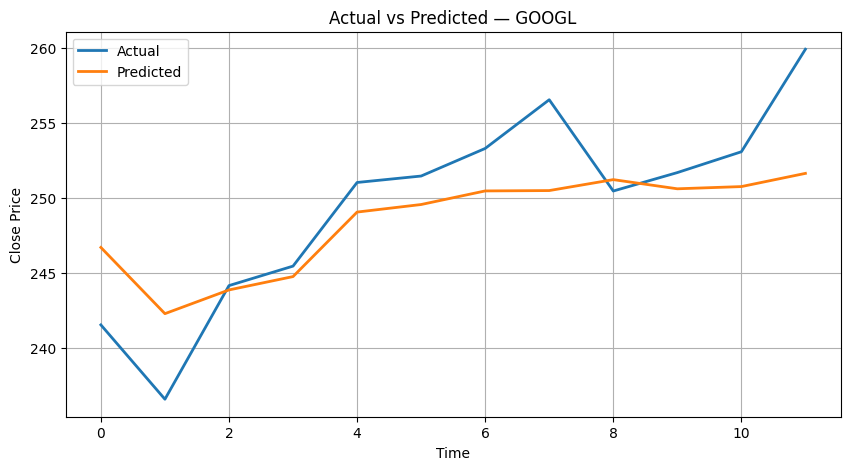

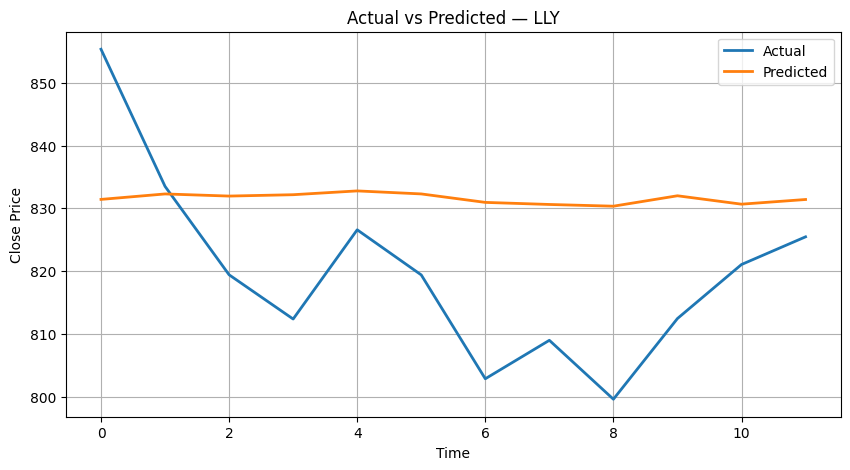

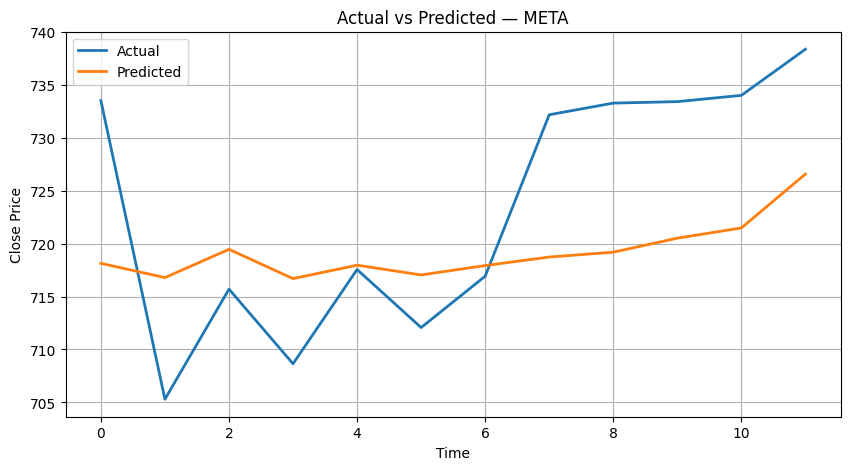

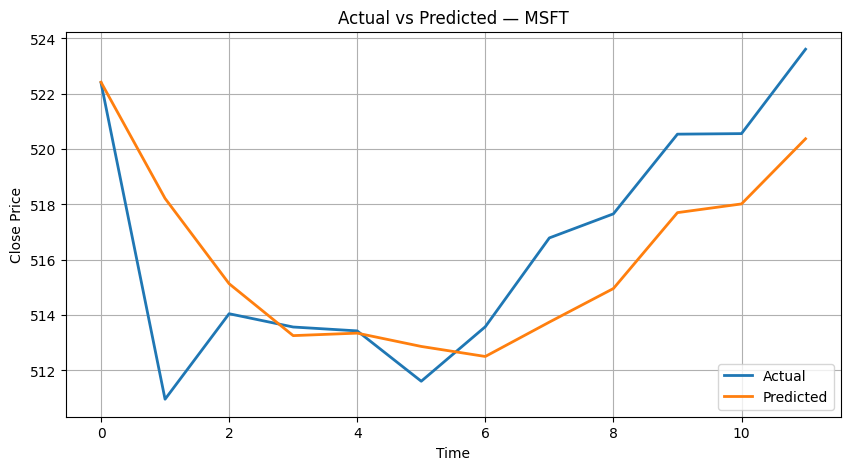

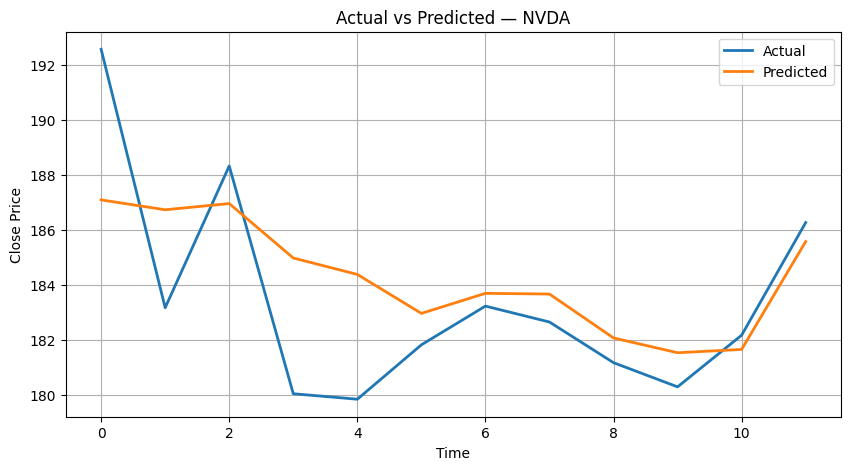

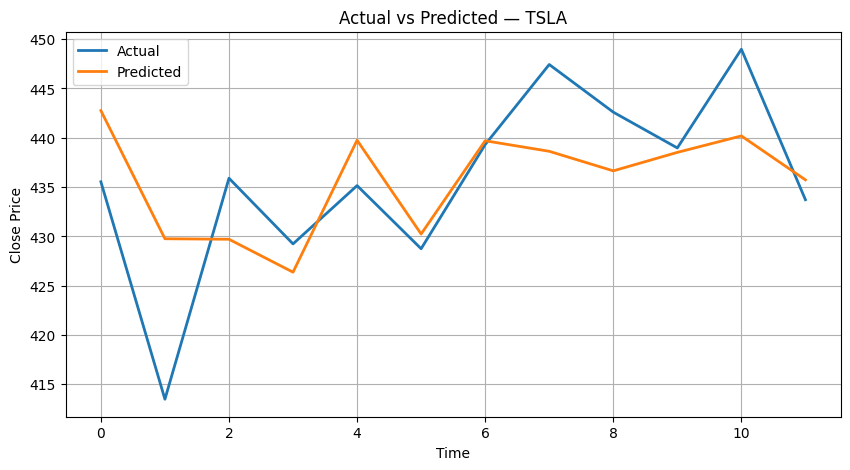

In [13]:
# --- READ CSV ---
df = pd.read_csv("") #import the data set

# Convert date
df["Date"] = pd.to_datetime(df["Date"])

# Ensure numeric columns
num_cols = ["Close", "Return", "lag_1", "lag_2", "lag_3", "lag_5", "MA_3", "MA_5", "Volatility_5"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# Group by ticker, because each ticker is in the same file
tickers = df["Ticker"].unique()

results = []
future_forecasts = {}

for ticker in tickers:
    df_t = df[df["Ticker"] == ticker].copy().reset_index(drop=True)

    # Drop any rows with missing features
    df_t = df_t.dropna(subset=num_cols)

    if len(df_t) < 20:
        print(f" Skipping {ticker}: Not enough rows after filtering ({len(df_t)})")
        continue

    # Features and target
    X = df_t[["Return","lag_1","lag_2","lag_3","lag_5","MA_3","MA_5","Volatility_5"]]
    y = df_t["Close"]

    # Train/test split (time series)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    # Model
    model = RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        max_depth=8,
        min_samples_split=5
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({"Ticker": ticker, "R²": r2, "MSE": mse, "MAE": mae})

      # ----- PLOT ACTUAL VS PREDICTED -----
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual", linewidth=2)
    plt.plot(y_pred, label="Predicted", linewidth=2)
    plt.title(f"Actual vs Predicted — {ticker}")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()


 Model Performance Summary Table:


,Ticker,R²,MSE,MAE
0,AAPL,0.006767,41.059547,5.956655
1,AMZN,0.208303,13.634078,2.942942
2,AVGO,0.156449,56.478141,5.972171
3,GOOG,0.599303,15.437917,3.016948
4,GOOGL,0.602871,15.655103,3.089899
5,LLY,-0.647489,337.097303,16.021506
6,META,0.136633,109.499830,9.148004
7,MSFT,0.524809,8.184823,2.120274
8,NVDA,0.404053,7.947357,2.156635
9,TSLA,0.402358,48.451579,5.420090


/tmp/ipython-input-2267462419.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ticker", y=metric, data=results_df, ax=ax, palette=[color]*len(results_df))
/tmp/ipython-input-2267462419.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ticker", y=metric, data=results_df, ax=ax, palette=[color]*len(results_df))
/tmp/ipython-input-2267462419.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ticker", y=metric, data=results_df, ax=ax, palette=[color]*len(results_df))


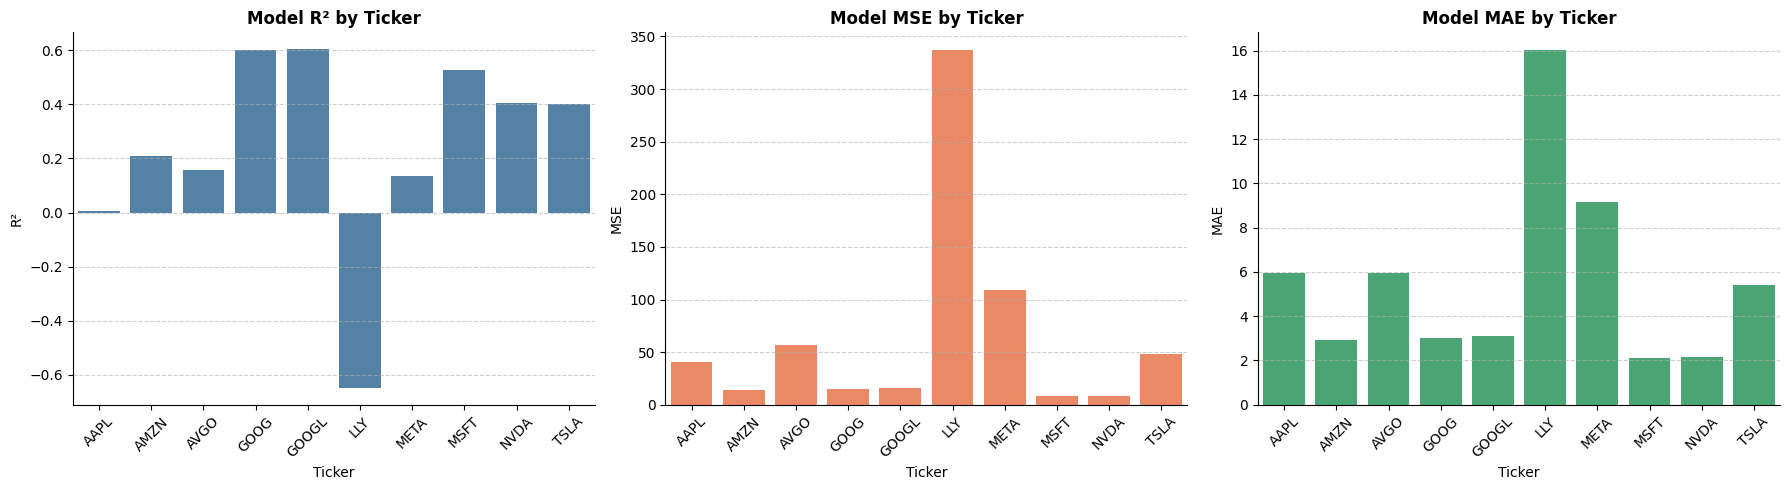

In [14]:

# --- Table of metrics ---
results_df = pd.DataFrame(results)
print(" Model Performance Summary Table:")
display(results_df)  # if using Jupyter/Colab, this will render a nice table

# --- Bar plots for each metric ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = ["R²", "MSE", "MAE"]
colors = ["steelblue", "coral", "mediumseagreen"]

for ax, metric, color in zip(axes, metrics, colors):
    sns.barplot(x="Ticker", y=metric, data=results_df, ax=ax, palette=[color]*len(results_df))
    ax.set_title(f"Model {metric} by Ticker", fontsize=12, weight="bold")
    ax.set_xlabel("Ticker")
    ax.set_ylabel(metric)
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

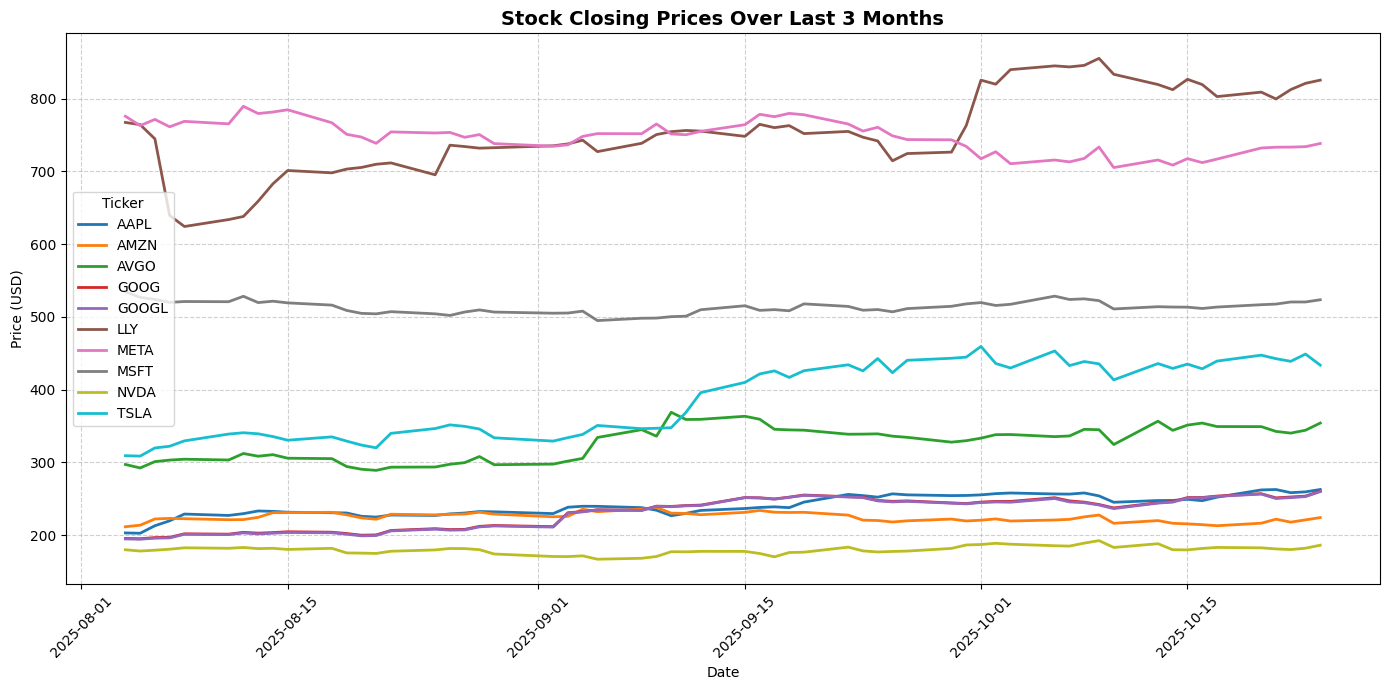

In [18]:
plt.figure(figsize=(14, 7))

for ticker in tickers:
    df_t = df[df["Ticker"] == ticker]   # filter by ticker
    plt.plot(df_t["Date"], df_t["Close"], label=ticker, linewidth=2)

plt.title("Stock Closing Prices Over Last 3 Months", fontsize=14, weight="bold")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(title="Ticker")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()




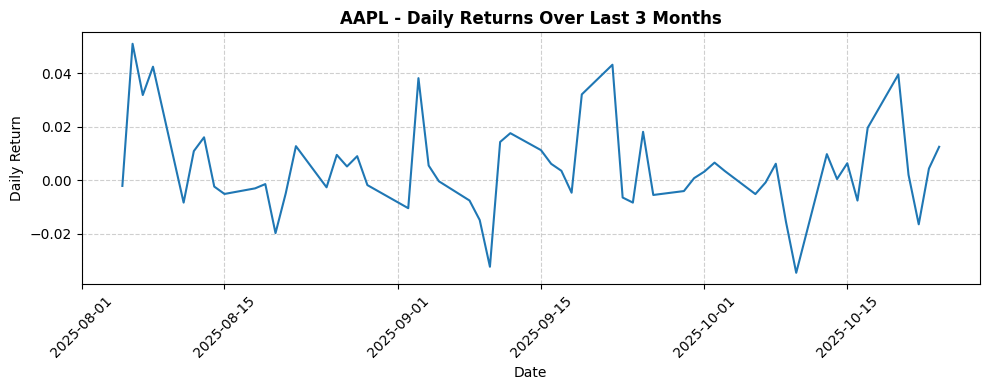

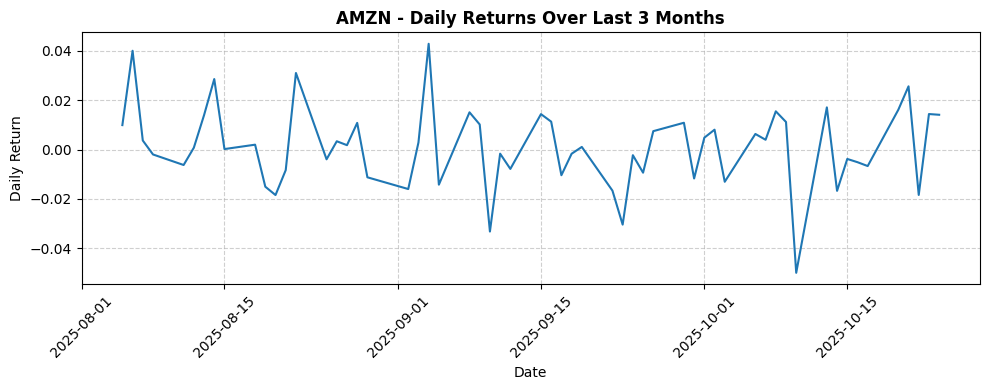

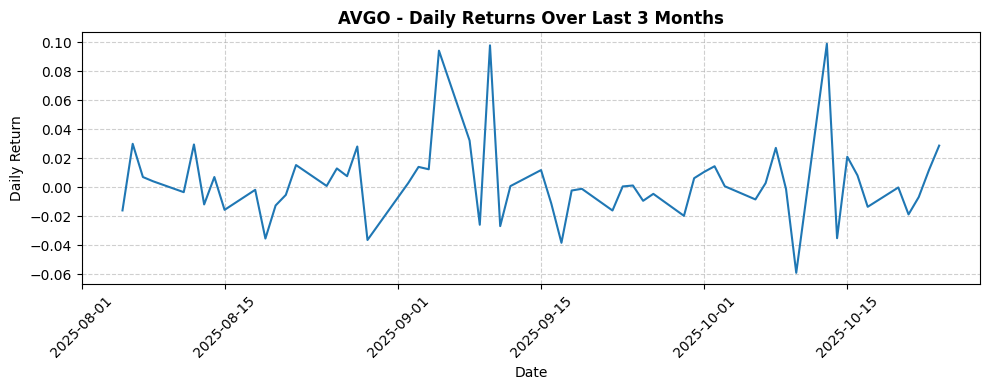

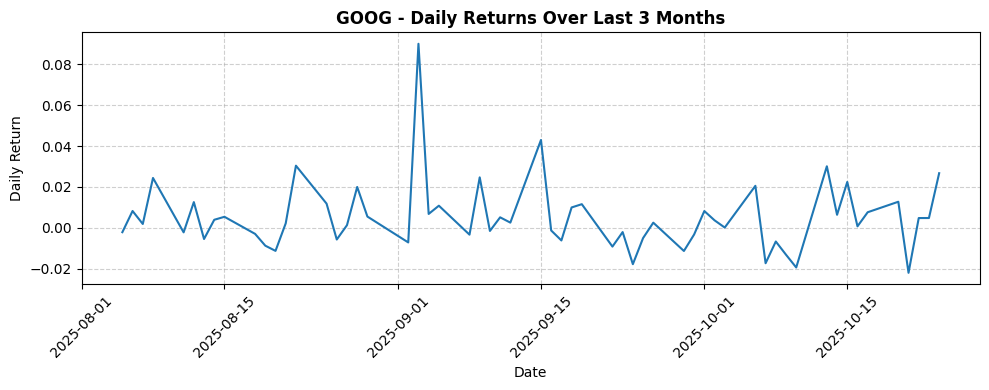

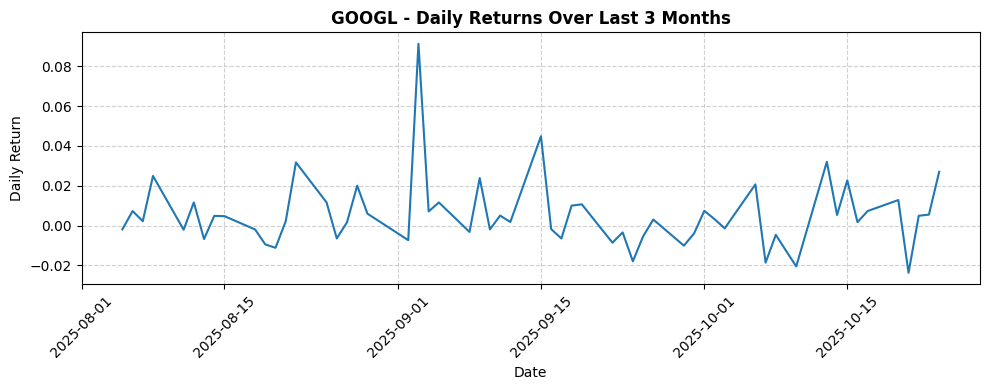

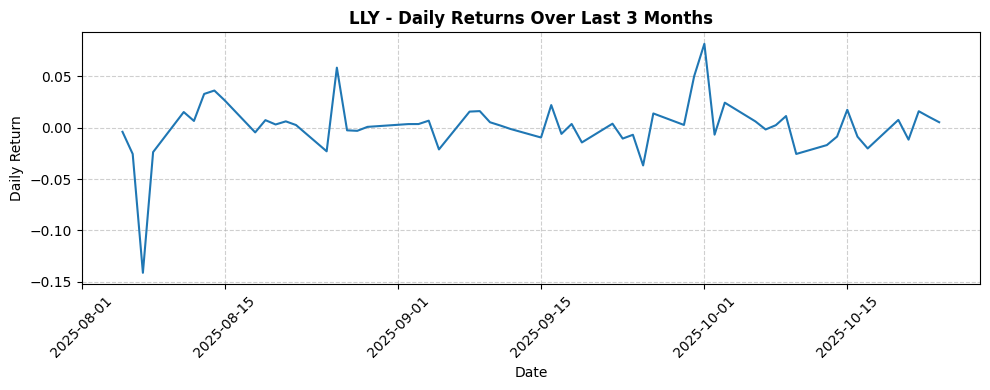

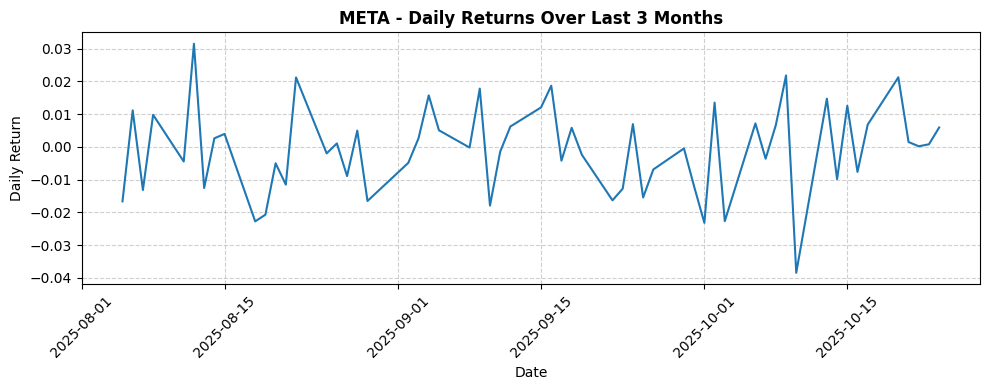

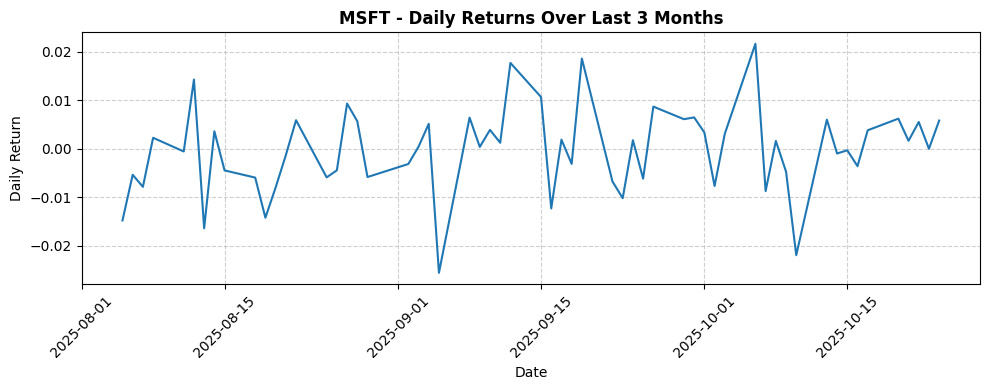

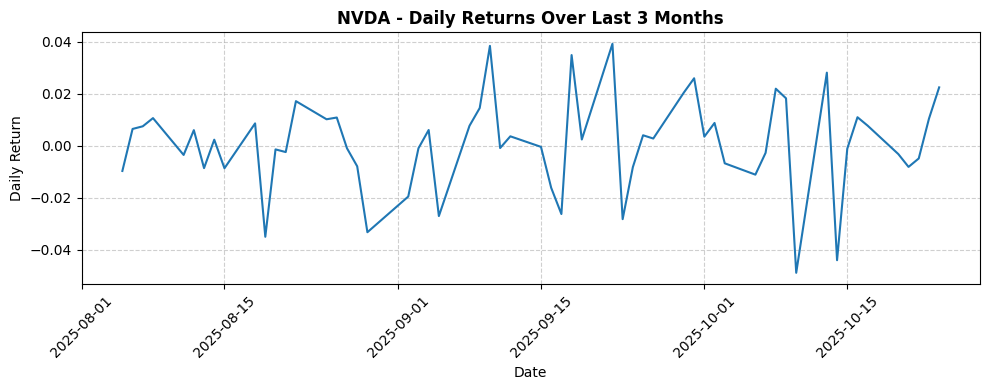

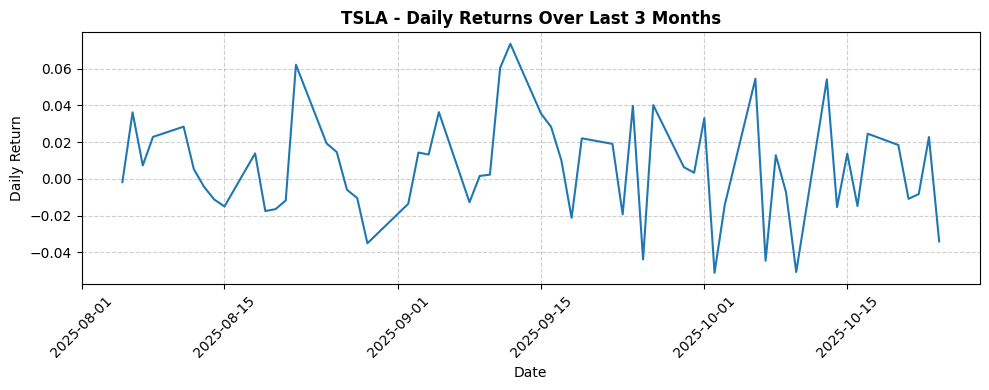

In [20]:
# --- INDIVIDUAL DAILY RETURN GRAPHS  ---
for ticker in tickers:
    df_t = df[df["Ticker"] == ticker].copy()

    # compute daily returns
    df_t["Daily_Return"] = df_t["Close"].pct_change()
    df_t = df_t.dropna(subset=["Daily_Return"])

    # plot
    plt.figure(figsize=(10, 4))
    plt.plot(df_t["Date"], df_t["Daily_Return"], color="#1f77b4", linewidth=1.5)
    plt.title(f"{ticker} - Daily Returns Over Last 3 Months", fontsize=12, weight="bold")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

